## Projeto 03 ⭐
Modelo de Classificação

#### Caracteristicas (features, x)
* unfinished

* expected_hours

* price

> 1 = FINALIZOU, 0 = NAO FINALIZOU.


#### Classificação (target, y)

**finalizado**

* 1 = FINALIZOU

* 0 = NAO FINALIZOU

In [95]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [96]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [97]:
colunas = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}
dados = dados.rename(columns = colunas)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [98]:
troca = {
    0 : 1,
    1: 0
}

In [99]:
dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

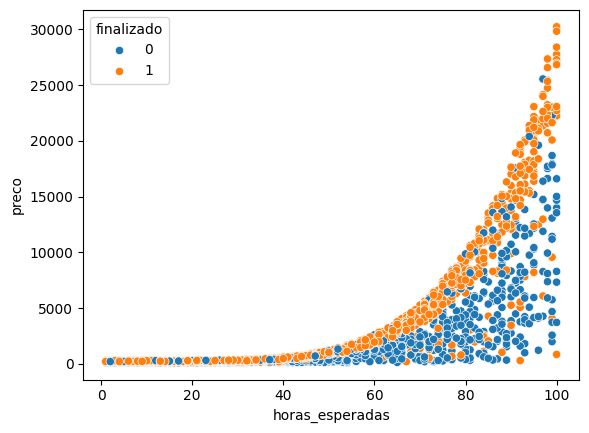

In [100]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

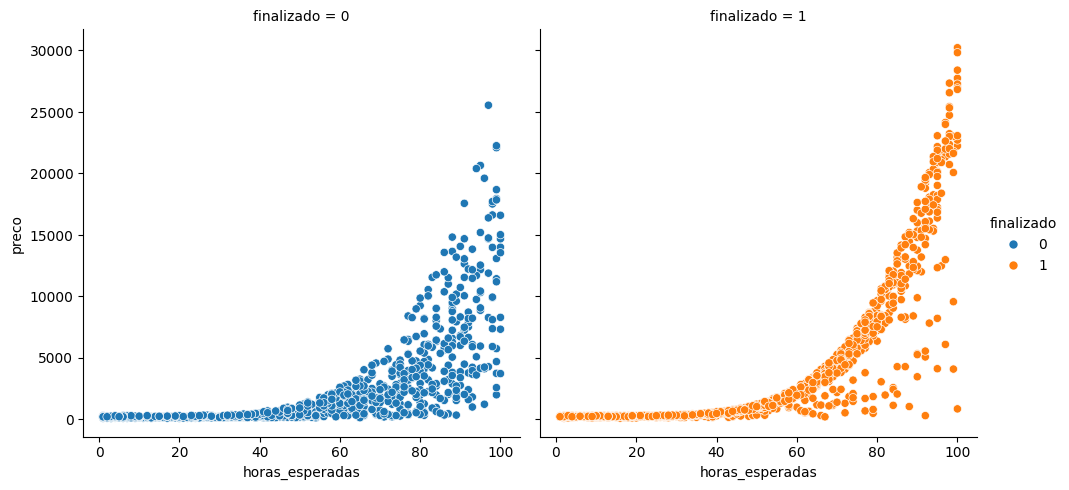

In [101]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

In [102]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [103]:
# De acordo com os valores de treino e teste, nao estao com uma boa proporcao equivalente.
SEED = 20
# Por padrao o random_state eh np.random, entao para nao adicionar basta utilizar o np.random.seed(SEED).
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, random_state=SEED, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f" % acuracia)

Treino: 1617, Teste: 540
A acuracia foi 47.41


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acuracia do algoritmo de baseline foi: %.2f%%" % acuracia)

A acuracia do algoritmo de baseline foi: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

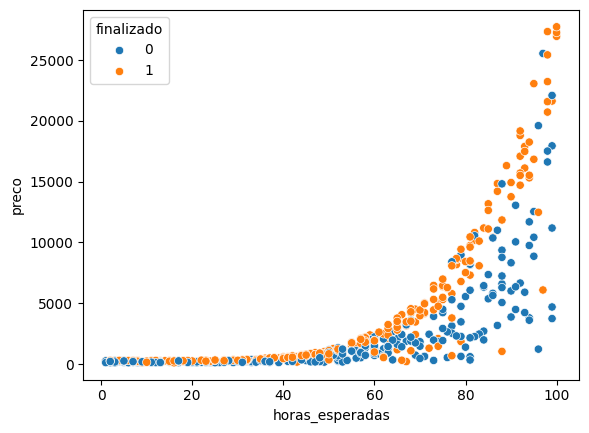

In [105]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)
# O treino e testes nao estao muito diferentes.
# o algoritmo tem que aprender de acordo com a cuvra.

In [106]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [107]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [108]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [109]:
Z = modelo.predict(pontos)
print(Z.shape)
print(xx.shape)

(10000,)
(100, 100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [110]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

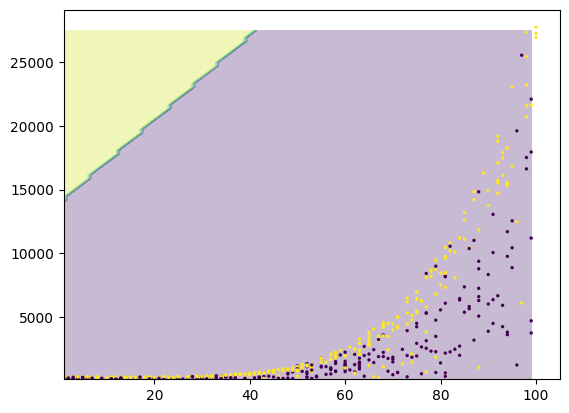

In [111]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=2)

# RETA

In [112]:
# Decision Boundary
# A cor amarela representa o que esta sendo classificado tudo como 0
# A cor roxa representa o que esta sendo classificado nada como 1

## Utilizando SVC

In [113]:
# De acordo com os valores de treino e teste, nao estao com uma boa proporcao equivalente.
SEED = 20
# Por padrao o random_state eh np.random, entao para nao adicionar basta utilizar o np.random.seed(SEED).
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f" % acuracia)

Treino: 1617, Teste: 540
A acuracia foi 53.15


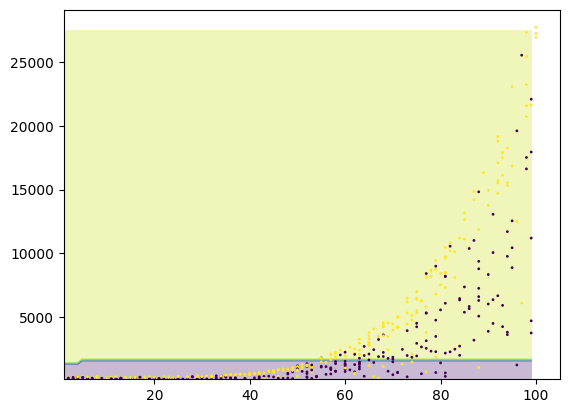

In [114]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

points_df = pd.DataFrame(pontos, columns=['horas_esperadas', 'preco'])

# Fazer a previsão com o modelo
z = modelo.predict(points_df)

# Reshape e plotar os resultados
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.show()

In [115]:
# Padronizar dados em uma faixa especifica
from sklearn.preprocessing import StandardScaler

# De acordo com os valores de treino e teste, nao estao com uma boa proporcao equivalente.
SEED = 20
# Por padrao o random_state eh np.random, entao para nao adicionar basta utilizar o np.random.seed(SEED).
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.25, stratify = y)
print("Treino: {}, Teste: {}".format(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f" % acuracia)

Treino: 1617, Teste: 540
A acuracia foi 70.37


In [116]:
treino_x

array([[ 1.00371462, -0.51176969],
       [-1.2017427 , -0.58099755],
       [-0.18653219, -0.51494346],
       ...,
       [ 0.93370011,  0.57881706],
       [-0.46659026, -0.56671559],
       [ 0.93370011,  0.89282193]])

In [117]:
raw_treino_x

,horas_esperadas,preco
970,79,533
657,16,184
409,45,517
1208,44,702
358,70,1523
...,...,...
381,83,4184
1125,24,297
1747,77,6031
959,37,256


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


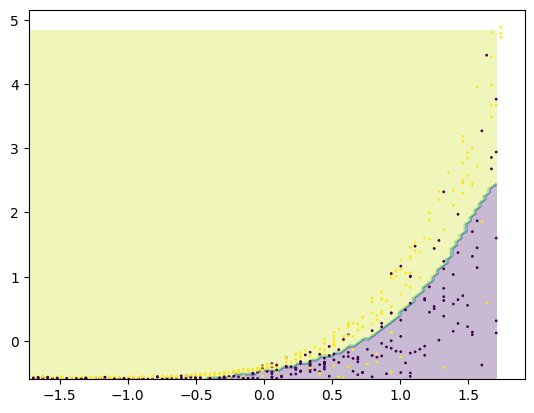

In [118]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

points_df = pd.DataFrame(pontos, columns=['horas_esperadas', 'preco'])

# Fazer a previsão com o modelo
z = modelo.predict(points_df)

# Reshape e plotar os resultados
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)
plt.show()